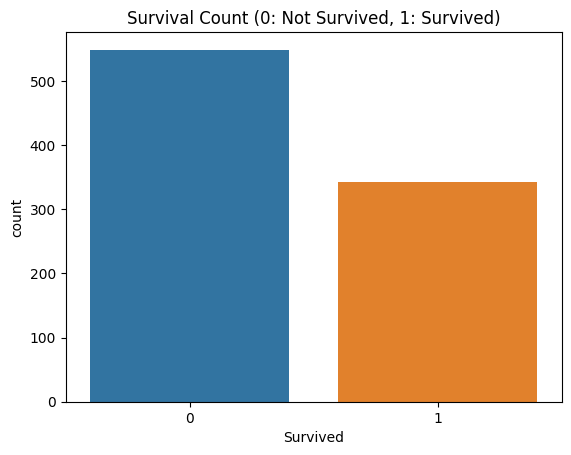

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


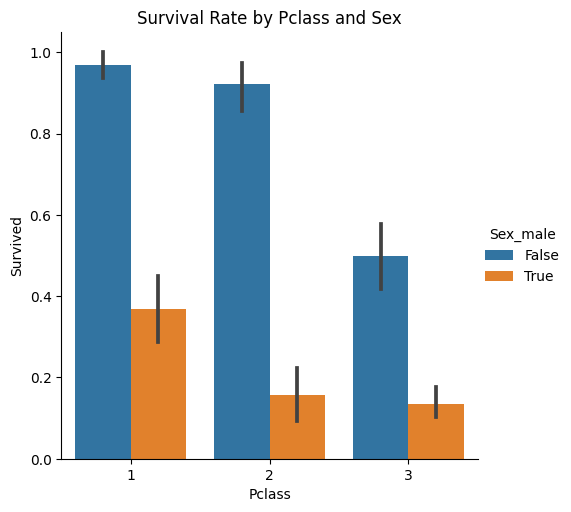

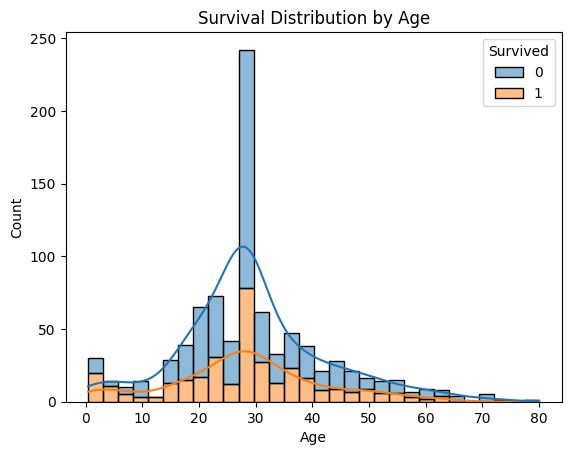

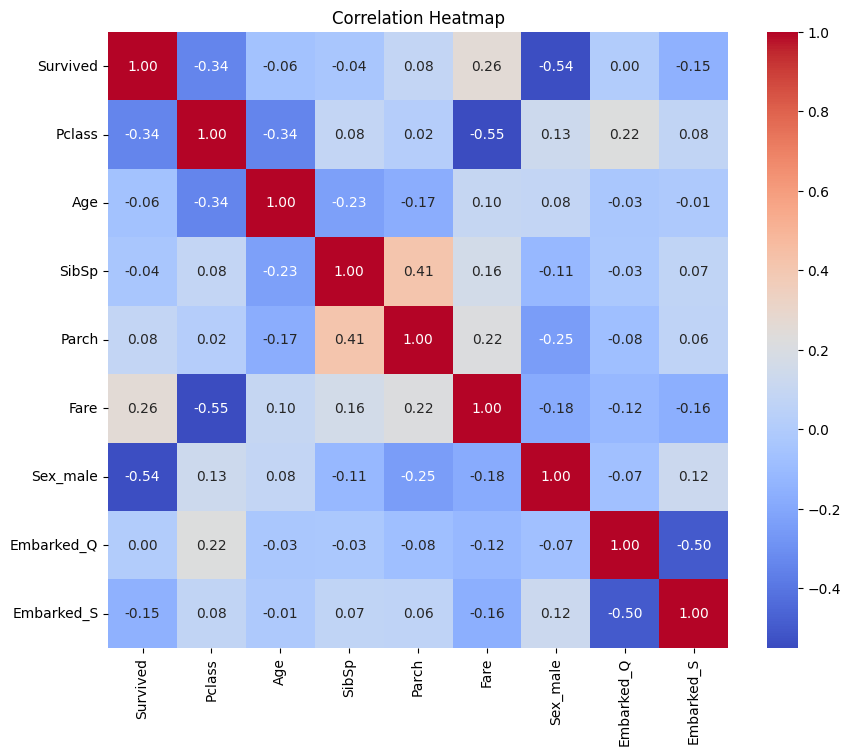

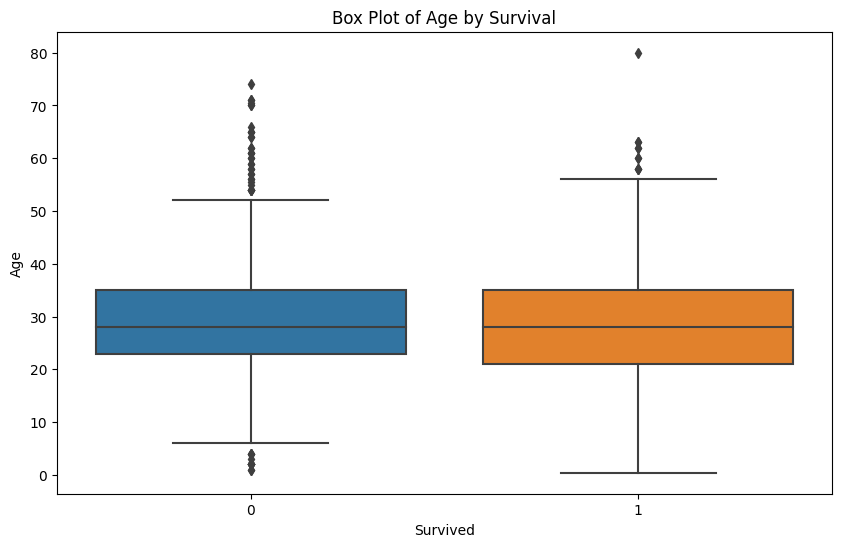

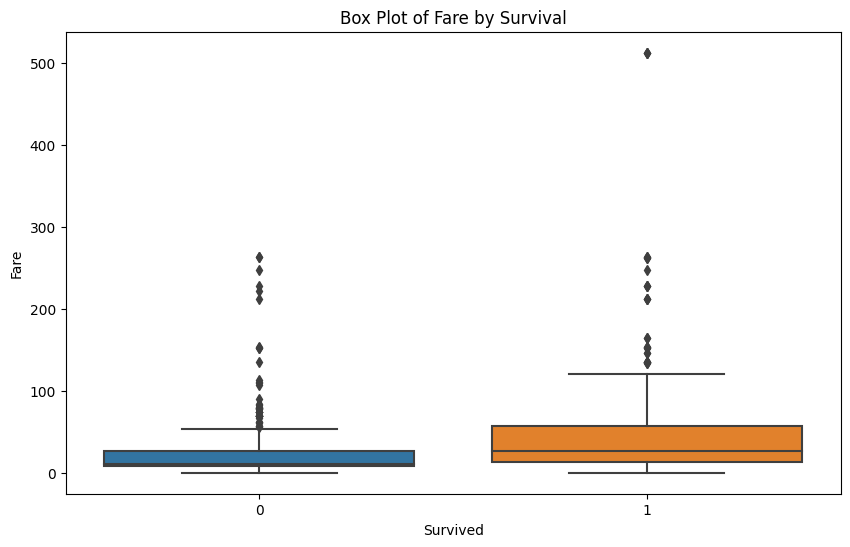

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


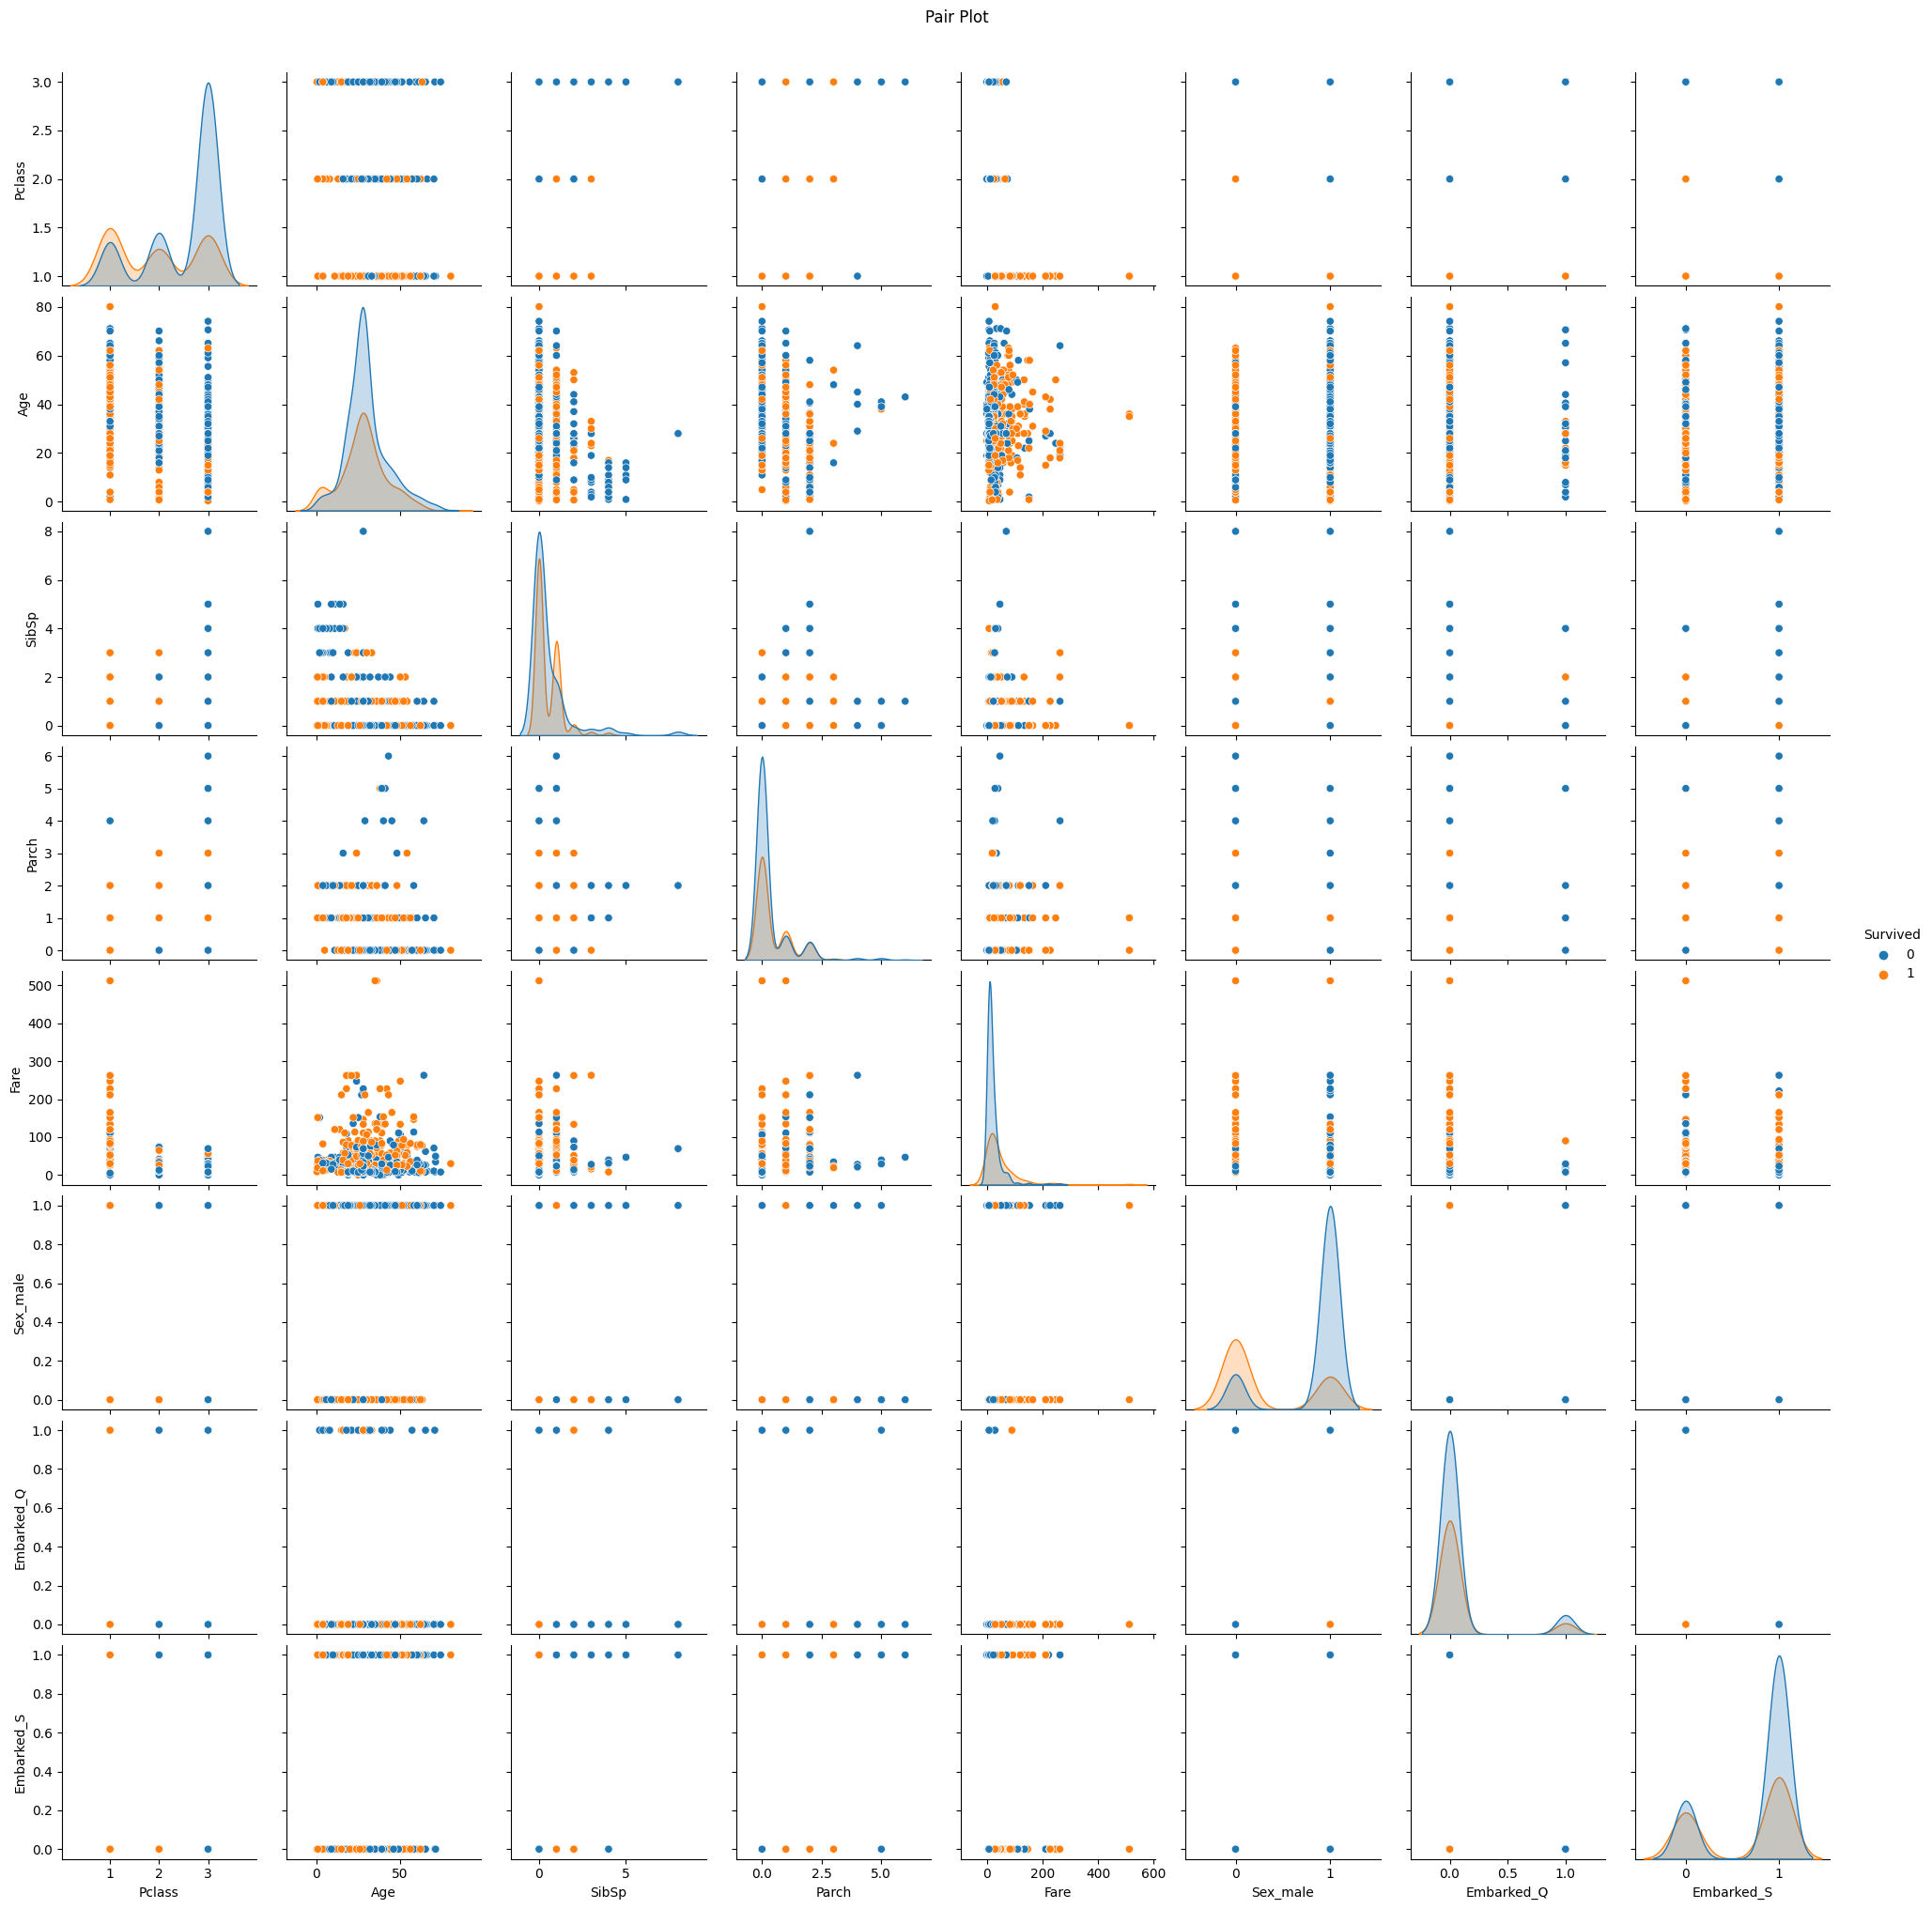

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


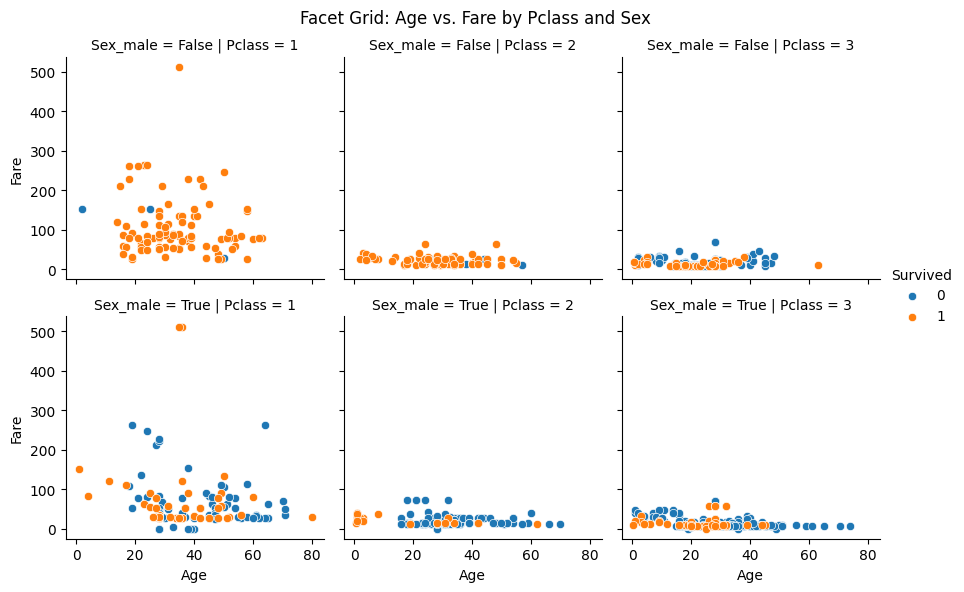

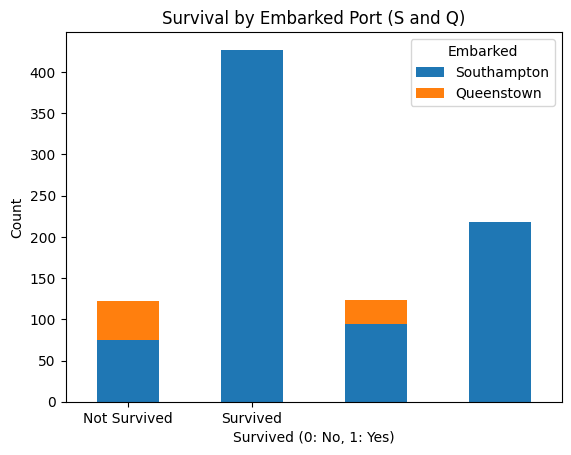

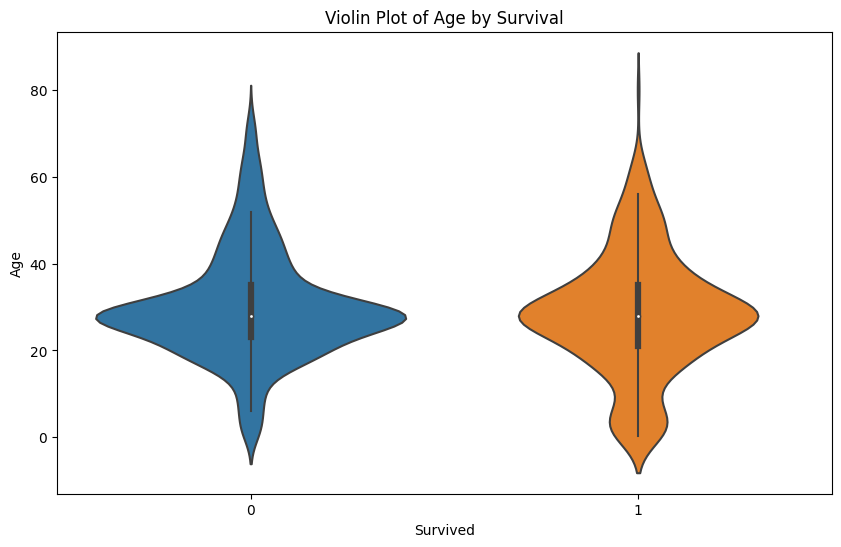

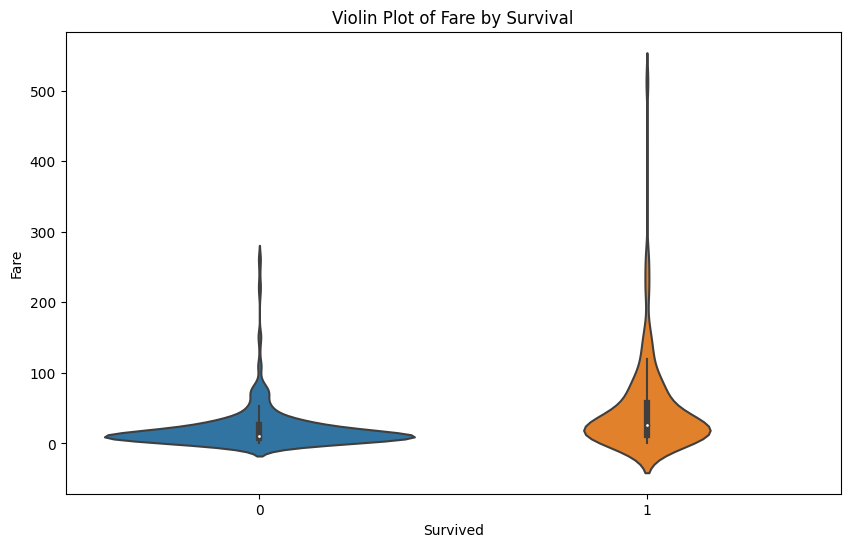

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset
# Replace 'titanic_dataset.csv' with the correct file path if it's in a different directory
titanic_data = pd.read_csv(r'C:\Users\harsh\Downloads\titanic.csv')

# Data preprocessing
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop irrelevant columns
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

# Visualize the data
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count (0: Not Survived, 1: Survived)')
plt.show()

sns.catplot(x='Pclass', y='Survived', hue='Sex_male', kind='bar', data=titanic_data)
plt.title('Survival Rate by Pclass and Sex')
plt.show()

sns.histplot(x='Age', hue='Survived', data=titanic_data, multiple='stack', kde=True)
plt.title('Survival Distribution by Age')
plt.show()

# Additional Visualizations

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Box Plots for Numerical Features
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Box Plot of Age by Survival')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.title('Box Plot of Fare by Survival')
plt.show()

# Pair Plot
sns.pairplot(titanic_data, hue='Survived', diag_kind='kde')
plt.suptitle('Pair Plot', y=1.02)
plt.show()

# Facet Grid Plots
g = sns.FacetGrid(titanic_data, col='Pclass', row='Sex_male', hue='Survived')
g.map(sns.scatterplot, 'Age', 'Fare')
g.add_legend(title='Survived')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Facet Grid: Age vs. Fare by Pclass and Sex')
plt.show()

# Stacked Bar Plot
survived_by_embarked = titanic_data.groupby(['Survived', 'Embarked_S', 'Embarked_Q']).size().unstack(fill_value=0)
survived_by_embarked.plot(kind='bar', stacked=True)
plt.title('Survival by Embarked Port (S and Q)')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=0)
plt.legend(title='Embarked', labels=['Southampton', 'Queenstown'])
plt.show()

# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=titanic_data)
plt.title('Violin Plot of Age by Survival')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Fare', data=titanic_data)
plt.title('Violin Plot of Fare by Survival')
plt.show()

# Feature selection
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))
